# **Welcome to the Topic Modeling Demo Notebook**

In this demo notebook we go through the `LDA_with_Grid.py` module and demonstrate its functionality.<br>

**Note:** At this stage, it is no longer required to have run the previous (webscraping, preprocessing, corpus making) notebooks as you can just import the pickled corpus, dictionary, tokens and dates - all that is needed for the LDA and DTM.

**Disclaimer:** The notebook was run by the authors on the "mavis" computing server (1024 GB memory; 40 physical cores at 3.1 GHz) of the Humboldt Lab for Empirical and Quantitative Research. Execution time may be significantly longer for other users.

### **The Dependencies**

First  import some basic libraries and then install the requirements to set up the environment needed for the project.

**Note:** It is not needed to install the requirements again if the user has already installed them in another module of the project.

In [1]:
# Install Requirements
!pip install -r ../requirements.txt

In [2]:
# Basic libraries
import re
import os
import gc
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import time

import sys
sys.path.append("..")
from measure_time import measure_time
import pickle

In [2]:
os.getcwd()

'/home/RDC/anasashb/Dokumente/DEDA_class_SoSe2023-split-quantlets/DEDA_class_SoSe2023_LDA_Theses/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_MSc_4_Topic_Modeling'

In [3]:
# Unpickling data from Corpus Maker

with open('../LDA_MSc_3_Making_Corpus/DICT_CORP/corpus.pkl', 'rb') as file:
    corpus = pickle.load(file)
    
with open('../LDA_MSc_3_Making_Corpus/DICT_CORP/dictionary_token2id.pkl', 'rb') as file:
    dictionary_token2id = pickle.load(file)
    
with open('../LDA_MSc_3_Making_Corpus/DICT_CORP/dictionary.pkl', 'rb') as file:
    dictionary = pickle.load(file)
    
with open('../LDA_MSc_3_Making_Corpus/DICT_CORP/texts.pkl', 'rb') as file:
    texts = pickle.load(file)

with open('../LDA_MSc_3_Making_Corpus/DICT_CORP/dates.pkl', 'rb') as file:
    dates = pickle.load(file)

## The LDA Class

We have defined a custom LDA class `LDA`, aimed at designing a simple,  user-friendly interface for carrying out LDA with grid search. 

As arguments, it takes `corpus`, `dictionary`, `texts` generated by the `CorpusMaker` class.

The class includes nine methods:

```python

LDA.simple_fit(): 'Fits an LDA model with user\'s specifications.'
LDA.gird_search(): 'Carries out a grid search per user\'s specified parameters.'
LDA.lineplot_scores(): 'Plots coherence and perplexity scores per topic numbers.'
LDA.heatmap_scores(): 'Plots coherence scores per alpha and beta values.'
LDA.build_best_model(): 'Fits the best model obtained in grid search.'
LDA.viz(): 'Visualizes model obtained by either simple_fit or build_best_model methods.'
LDA.time_slicer(): 'Pre-processes the master\'s theses years as input for the sequential model.'
LDA.DTM(): 'Builds sequential model.'
LDA.DTM_Plot(): 'Plots the evolution of topics over time.'
```

In [4]:
# Import the custom-made class
from LDA_with_Grid import LDA

warnings.filterwarnings("ignore")

C:\Users\baltt\anaconda3\lib\site-packages\numexpr\expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
C:\Users\baltt\anaconda3\lib\site-packages\numexpr\expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
C:\Users\baltt\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\baltt\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\baltt\anaconda3\lib\site-packages\seaborn\cm.py:1582: MatplotlibDepre

In [5]:
LDA?

Init signature: LDA(corpus, dictionary, texts, dates)
Docstring:     
A custom LDA interface designed to carry out a grid search, find the best model and vizualize it. 
Dynamic topic modelling can be also done if grid search is carried out first. 

Args:

    corpus: A bag of words corpus (Already generated by CorpusMaker)
    dictionary: A gensim dictionary (Already generated by CorpusMaker)
    texts: All tokens (Already generated by CorpusMaker)
    dates: All dates of the papers (Already generated by CorpusMaker
    
How to use:
    
    MSc_LDA = LDA(corpus, dictionary, texts) <-- initializes the class
    m = MSc_LDA.simple_fit() <-- fits one model with custom specs
    MSc_LDA.grid_search(n_topics, alphas, betas) <-- conducts grid search
    MSc_LDA.lineplot_scores() <-- plots coherence scores from the first grid search round
    MSc_LDA.heatmap_scores() <-- plots coherence scores from the second grid search round
    m = MSc_LDA.build_best_model() <-- fits best model
    MSc_LD

### Using the `.simple_fit()`

The model fitted by the mentioned method is not included in the project results and merely serves as a demonstration of the LDA class.

In [5]:
# Initialize the class
MSc_LDA = LDA(corpus, dictionary, texts, dates)

In [7]:
# Set up a single model with following parameters 
n_top = 10
alpha_val = 'symmetric'
beta_val = 0.6

simple_m = MSc_LDA.simple_fit(n_top = n_top,
                             alpha_val = alpha_val,
                             beta_val = beta_val)


Coherence Score is: 0.42202506810362095

Perplexity Score is: -7.579881082230317

See the topics:
(0, '0.014*"model" + 0.011*"data" + 0.010*"use" + 0.010*"sentiment" + 0.008*"base" + 0.008*"time" + 0.007*"network" + 0.007*"learn" + 0.006*"word" + 0.006*"input"')
(1, '0.021*"factor" + 0.017*"return" + 0.012*"market" + 0.012*"model" + 0.011*"risk" + 0.009*"asset" + 0.007*"time" + 0.007*"cryptocurrency" + 0.006*"network" + 0.006*"data"')
(2, '0.015*"model" + 0.012*"variable" + 0.010*"data" + 0.008*"use" + 0.006*"company" + 0.006*"tree" + 0.005*"success" + 0.005*"regression" + 0.004*"funding" + 0.004*"startup"')
(3, '0.018*"data" + 0.009*"value" + 0.006*"feature" + 0.006*"analysis" + 0.005*"area" + 0.005*"model" + 0.005*"price" + 0.005*"spatial" + 0.005*"method" + 0.005*"property"')
(4, '0.016*"portfolio" + 0.011*"data" + 0.010*"copula" + 0.009*"cluster" + 0.008*"distribution" + 0.008*"risk" + 0.008*"model" + 0.008*"return" + 0.007*"factor" + 0.007*"use"')
(5, '0.023*"frm" + 0.014*"risk" 

In [8]:
# Vizualize model
MSc_LDA.viz(model_type = 'simple') 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.069992 -0.021755       1        1  20.240139
9      0.053557 -0.061510       2        1  17.186971
0     -0.022668  0.008787       3        1  12.504764
7      0.067505 -0.004560       4        1  12.416085
2      0.010024  0.057971       5        1  11.236977
3     -0.037552  0.123705       6        1   6.585294
5      0.045339 -0.077384       7        1   6.564299
6      0.020616  0.098059       8        1   6.082133
1      0.013295 -0.069696       9        1   3.857806
8     -0.220107 -0.053618      10        1   3.325534, topic_info=        Term         Freq        Total Category  logprob  loglift
3316     frm  1228.000000  1228.000000  Default  30.0000  30.0000
1865  factor  2385.000000  2385.000000  Default  29.0000  29.0000
895     risk  3692.000000  3692.000000  Default  28.0000  28.0000
4475  copula  2009.000000  2009.000000  Default  27.0000  27.0000
886   return  3764.000000  3764.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
625   market   136.398736  3420.769035  Topic10  -5.2645   0.1815
517    index   104.942471  1729.891524  Topic10  -5.5267   0.6011
1097     use   114.919991  4967.452819  Topic10  -5.4358  -0.3629
801    price   104.702027  3426.289218  Topic10  -5.5290  -0.0846
886   return    98.384826  3764.897148  Topic10  -5.5912  -0.2410

[694 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1175      1  0.940891   ac
1175      2  0.001940   ac
1175      3  0.003880   ac
1175      4  0.011640   ac
1175      5  0.005820   ac
...     ...       ...  ...
6290      2  0.056777  yes
6290      4  0.022711  yes
6290      5  0.851654  yes
6290      6  0.011355  yes
6290      8  0.034066  yes

[4200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 10, 1, 8, 3, 4, 6, 7, 2, 9])

### Using the `.grid_search()` and `.build_best_model()`


### 1st Iteration of the Search:
Search for the optimal number of topics while fixing alpha and beta as constant.

In [9]:
# Set up parameter grid 
n_topics = range(2,30)
alpha = ['symmetric']
beta = ['auto']


In [10]:
# Set begin time
st = time.time()

# Do the grid search
MSc_LDA.grid_search(n_topics, alpha, beta, verbose = True)

# Setting verbose = True ensures the function output in detail 

# Measure execution time
measure_time(st)


Number of topics: 2; alpha: symmetric; beta: auto; Achieved coherence score: 0.34198770374602727

Number of topics: 3; alpha: symmetric; beta: auto; Achieved coherence score: 0.324431324777173

Number of topics: 4; alpha: symmetric; beta: auto; Achieved coherence score: 0.37363104685248966

Number of topics: 5; alpha: symmetric; beta: auto; Achieved coherence score: 0.3615928816646424

Number of topics: 6; alpha: symmetric; beta: auto; Achieved coherence score: 0.40017748268360814

Number of topics: 7; alpha: symmetric; beta: auto; Achieved coherence score: 0.39526848638429823

Number of topics: 8; alpha: symmetric; beta: auto; Achieved coherence score: 0.41958357016216713

Number of topics: 9; alpha: symmetric; beta: auto; Achieved coherence score: 0.43072943463967256

Number of topics: 10; alpha: symmetric; beta: auto; Achieved coherence score: 0.4606324670557487

Number of topics: 11; alpha: symmetric; beta: auto; Achieved coherence score: 0.4379856406111435

Number of topics: 12; 

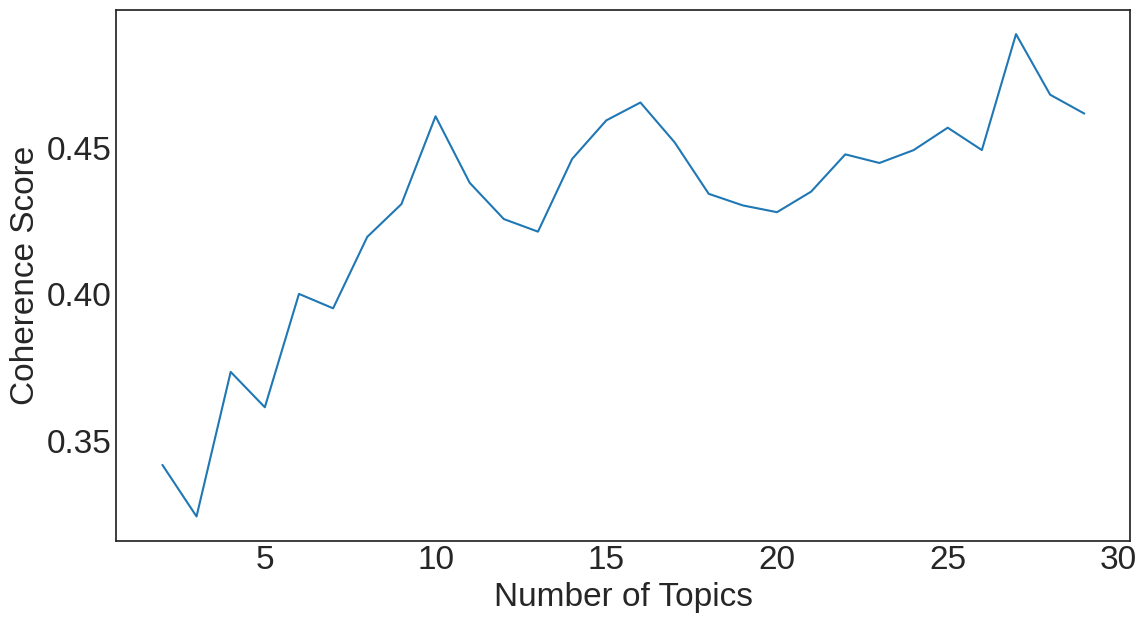

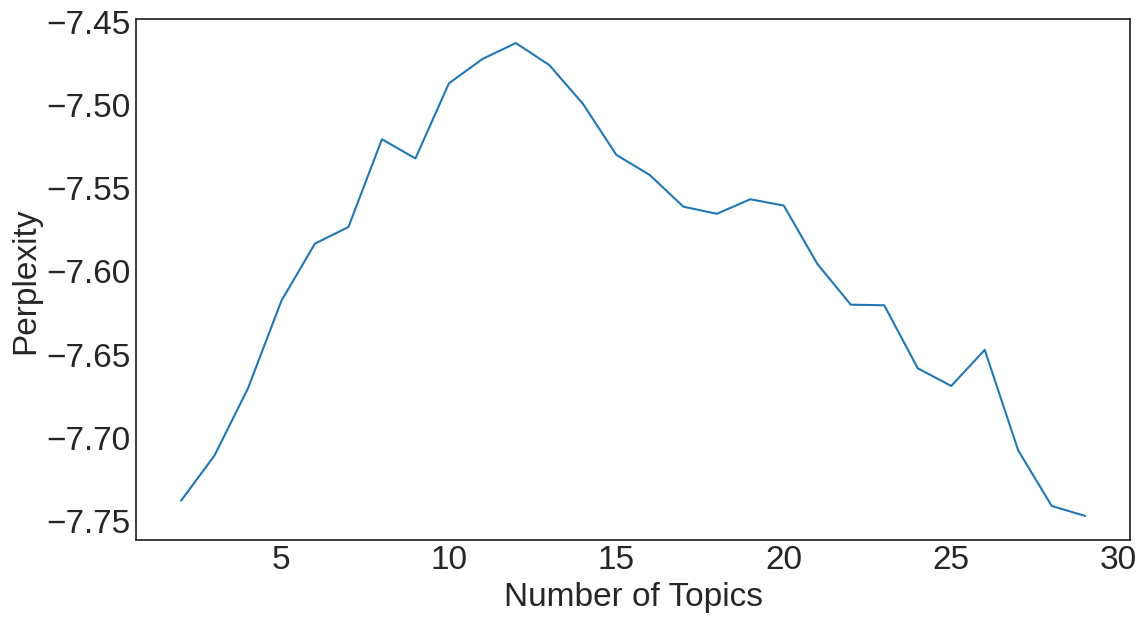

In [11]:
# Plot the scores
MSc_LDA.lineplot_scores()

In [12]:
# call best model
best_m = MSc_LDA.build_best_model()

(24, '0.020*"estimator" + 0.020*"model" + 0.019*"covariance" + 0.018*"realize" + 0.017*"volatility" + 0.017*"distribution" + 0.015*"inc" + 0.015*"matrix" + 0.014*"portfolio" + 0.012*"stock"')
(14, '0.013*"temperature" + 0.011*"use" + 0.011*"model" + 0.011*"ar" + 0.011*"var" + 0.009*"spatial" + 0.008*"landkreis" + 0.008*"country" + 0.008*"variable" + 0.007*"region"')
(26, '0.044*"svi" + 0.041*"day" + 0.038*"week" + 0.027*"model" + 0.020*"minute" + 0.020*"period" + 0.019*"di" + 0.016*"granularity" + 0.016*"learn" + 0.015*"univariate"')
(23, '0.035*"rate" + 0.030*"wealth" + 0.021*"kelly" + 0.018*"swap" + 0.016*"give" + 0.016*"time" + 0.015*"strategy" + 0.015*"trial" + 0.013*"forward" + 0.013*"mean"')
(13, '0.019*"data" + 0.011*"model" + 0.010*"feature" + 0.010*"order" + 0.009*"price" + 0.009*"time" + 0.007*"value" + 0.007*"prediction" + 0.006*"level" + 0.006*"use"')
(6, '0.043*"copula" + 0.029*"model" + 0.020*"cdo" + 0.017*"tranche" + 0.017*"correlation" + 0.015*"default" + 0.013*"csv" + 

In [13]:
# Viz best model by setting model_type = 'best'
MSc_LDA.viz(model_type = 'best')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18     0.055161 -0.008741       1        1  10.983699
3      0.012704  0.037030       2        1   6.135180
13     0.029845  0.136859       3        1   5.914617
22     0.075098 -0.100777       4        1   5.709504
12     0.026885 -0.094293       5        1   5.679020
15     0.040271  0.136047       6        1   5.611601
9      0.072317 -0.064972       7        1   5.600222
20     0.066355  0.121548       8        1   4.929039
0      0.020556 -0.156832       9        1   4.565640
26    -0.019328  0.057782      10        1   4.274232
2      0.034113  0.145052      11        1   4.215293
16     0.029706 -0.040004      12        1   3.708914
25     0.005488 -0.077811      13        1   3.568980
11     0.053457  0.109329      14        1   3.471802
24     0.040383 -0.097873      15        1   3.202361
4      0.060015 -0.005681      16        1   3.184122
21     0.047966  0.158755      17        1   2.860185
14     0.020365 -0.059332      18        1   2.773242
17     0.121836  0.008675      19        1   2.695913
7      0.090379  0.009251      20        1   2.351145
5      0.109347 -0.036015      21        1   2.184270
19    -0.015026 -0.007937      22        1   1.870872
6     -0.068024 -0.108271      23        1   1.686479
23    -0.073317 -0.173476      24        1   1.418201
8     -0.227741  0.053311      25        1   0.843261
10    -0.269980  0.058067      26        1   0.495154
1     -0.338832  0.000309      27        1   0.067052, topic_info=                 Term         Freq        Total Category  logprob  loglift
4475           copula  2817.000000  2817.000000  Default  30.0000  30.0000
1060             time  5034.000000  5034.000000  Default  29.0000  29.0000
736            option  1552.000000  1552.000000  Default  28.0000  28.0000
10516             svi  1504.000000  1504.000000  Default  27.0000  27.0000
3316              frm  1175.000000  1175.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
998             stock     7.282727  1355.607651  Topic27  -4.2907   2.0810
600            liquid     3.551568   123.688942  Topic27  -5.0088   3.7571
667             month     3.037313   390.668977  Topic27  -5.1652   2.4506
933    semiparametric     2.614053   138.134855  Topic27  -5.3153   3.3401
1315         deutsche     2.255106    68.866804  Topic27  -5.4630   3.8885

[1911 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
5206      17  0.808226  abnormal
5206      19  0.164171  abnormal
1175       1  0.003689        ac
1175       3  0.018444        ac
1175       6  0.014755        ac
...      ...       ...       ...
1172      17  0.011363        zu
1172      20  0.007576        zu
1172      23  0.011363        zu
11933      1  0.952784        zv
9660      14  0.813113  zwischen

[8420 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 4, 14, 23, 13, 16, 10, 21, 1, 27, 3, 17, 26, 12, 25, 5, 22, 15, 18, 8, 6, 20, 7, 24, 9, 11, 2])

### 2nd Iteration of the Search:
Fix the number of topics as obtained from the previous round and search for optimal $\alpha$ and $\beta$ values.

In [14]:
# Set up parameter grid 

n_topics = [12]
alphas = np.arange(0.1, 1, 0.2).tolist()
betas = np.arange(0.1, 1, 0.2).tolist()

# Append symmetric and automatic alpha and beta values to the grid manually.
alphas.append('symmetric')
betas.append('auto')

In [15]:
# Set up begin time
st = time.time()

# Remove the assigned best score from the previous iteration
MSc_LDA.best_score = -1

# Do the grid search
MSc_LDA.grid_search(n_topics, alphas, betas, verbose = True)

# Measure execution time
measure_time(st)


Number of topics: 12; alpha: 0.1; beta: 0.1; Achieved coherence score: 0.42886601926369167

Number of topics: 12; alpha: 0.1; beta: 0.30000000000000004; Achieved coherence score: 0.42828941915549884

Number of topics: 12; alpha: 0.1; beta: 0.5000000000000001; Achieved coherence score: 0.45975439723306444

Number of topics: 12; alpha: 0.1; beta: 0.7000000000000001; Achieved coherence score: 0.4467419662133259

Number of topics: 12; alpha: 0.1; beta: 0.9000000000000001; Achieved coherence score: 0.4421322913909707

Number of topics: 12; alpha: 0.1; beta: auto; Achieved coherence score: 0.42564643824949727

Number of topics: 12; alpha: 0.30000000000000004; beta: 0.1; Achieved coherence score: 0.42886601926369167

Number of topics: 12; alpha: 0.30000000000000004; beta: 0.30000000000000004; Achieved coherence score: 0.42830708397502143

Number of topics: 12; alpha: 0.30000000000000004; beta: 0.5000000000000001; Achieved coherence score: 0.45975439723306444

Number of topics: 12; alpha: 0.3

In [16]:
# call best model
best_m = MSc_LDA.build_best_model()

(0, '0.020*"time" + 0.017*"order" + 0.015*"data" + 0.014*"prediction" + 0.012*"price" + 0.011*"model" + 0.010*"series" + 0.010*"level" + 0.009*"bid" + 0.008*"ask"')
(1, '0.013*"crypto" + 0.012*"function" + 0.011*"contract" + 0.010*"currency" + 0.010*"blockchain" + 0.009*"value" + 0.008*"smart" + 0.007*"token" + 0.007*"address" + 0.007*"coin"')
(2, '0.014*"model" + 0.010*"variable" + 0.010*"data" + 0.009*"use" + 0.007*"value" + 0.006*"test" + 0.006*"one" + 0.005*"result" + 0.005*"function" + 0.005*"method"')
(3, '0.012*"data" + 0.009*"energy" + 0.009*"function" + 0.007*"use" + 0.007*"inc" + 0.006*"consumption" + 0.006*"may" + 0.005*"matrix" + 0.005*"error" + 0.005*"value"')
(4, '0.020*"portfolio" + 0.014*"data" + 0.010*"cluster" + 0.010*"copula" + 0.008*"distribution" + 0.008*"return" + 0.007*"risk" + 0.007*"weight" + 0.007*"number" + 0.007*"variance"')
(5, '0.028*"frm" + 0.016*"risk" + 0.012*"private" + 0.012*"return" + 0.011*"equity" + 0.010*"financial" + 0.010*"test" + 0.009*"market"

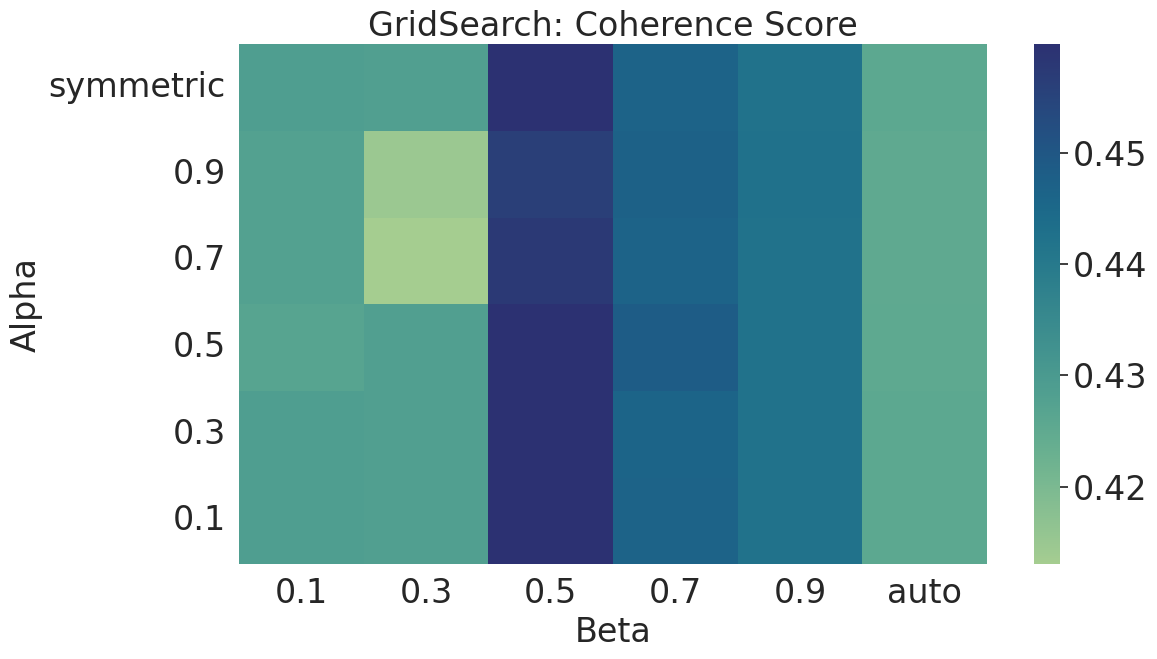

In [17]:
# Visuzalize results of the grid search
MSc_LDA.heatmap_scores()

warnings.filterwarnings("ignore")

In [18]:
# Viz best model by setting model_type = 'best'
MSc_LDA.viz(model_type = 'best')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.026202 -0.004770       1        1  20.229353
7      0.047843 -0.050045       2        1  15.118305
9      0.084661 -0.052195       3        1  12.375479
4      0.050379 -0.090265       4        1  12.009556
10     0.022931  0.066029       5        1   9.532145
3     -0.067441 -0.014958       6        1   5.472493
11     0.026593  0.064875       7        1   5.147063
8     -0.186212 -0.026892       8        1   5.094370
5      0.112100 -0.043961       9        1   5.077395
6     -0.044061 -0.087752      10        1   4.937758
1      0.037859  0.200986      11        1   2.746538
0     -0.110854  0.038948      12        1   2.259544, topic_info=            Term         Freq        Total Category  logprob  loglift
4475      copula  1875.000000  1875.000000  Default  30.0000  30.0000
10516        svi  1191.000000  1191.000000  Default  29.0000  29.0000
3316         frm  1119.000000  1119.000000  Default  28.0000  28.0000
238          day  2440.000000  2440.000000  Default  27.0000  27.0000
783    portfolio  2698.000000  2698.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2423        http    71.868186   630.065395  Topic12  -5.5188   1.6190
691      network    79.549039  1161.442798  Topic12  -5.4172   1.1090
1097         use    80.461723  5029.946333  Topic12  -5.4058  -0.3454
924          see    71.252470  1389.617846  Topic12  -5.5274   0.8195
613          log    68.941382  1288.737304  Topic12  -5.5604   0.8618

[835 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1175      1  0.029754   ac
1175      2  0.027465   ac
1175      3  0.002289   ac
1175      4  0.888045   ac
1175      5  0.011444   ac
...     ...       ...  ...
1172      8  0.033440   zu
1172      9  0.016720   zu
1172     10  0.029260   zu
1172     11  0.280056   zu
1172     12  0.012540   zu

[5431 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 10, 5, 11, 4, 12, 9, 6, 7, 2, 1])

## Dynamic Topic Modeling Using `.DTM()` Method

To run the DTM, there are two pre-requisites: 
- The user should have conducted a grid search and received the parameters of the best model found during search.
- The user should preprocess the year batches as input for the dynamic topic model. This can be done through the `.time_slicer()` method included in the LDA class.

In [19]:
# Inspect the time slicer which will set up batches to be used in sequential modeling
MSc_LDA.time_slicer?

Signature: MSc_LDA.time_slicer(year_batches)
Docstring:
Takes a list of several year ranges and converts them into time slices as an input for dtm.

Args:
    year_batches: List of several year ranges
Returns:
    time_slice: input for dtm
    
Example use:
    Set up variable: 
        year_batches = [range(2002,2009), range(2009,2016), range(2016, 2020), range(2020, 2024)]
    Run method:
        time_slicer(year_btaches)
File:      ~/Dokumente/DEDA_class_SoSe2023-split-quantlets/DEDA_class_SoSe2023_LDA_Theses/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_MSc_4_Topic_Modeling/LDA_with_Grid.py
Type:      method

In [20]:
# Set up year_batches as input to the method
year_batches = [range(2002,2009), range(2009,2016), range(2016, 2020), range(2020, 2024)]
# Run the method
MSc_LDA.time_slicer(year_batches)

[29, 50, 24, 18]

Having preprocessed the year batches, now it is possible to move on to dynamic topic modelling.

In [21]:
# Inspect the method
MSc_LDA.DTM?

Signature: MSc_LDA.DTM(year_batches)
Docstring:
Builds a DTM model following the best parameters received from grid_search. Note: function will not work without conducting a grid search.

Inputs:
    year_batches: List of several year ranges
Returns:
    Sequential model
File:      ~/Dokumente/DEDA_class_SoSe2023-split-quantlets/DEDA_class_SoSe2023_LDA_Theses/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_MSc_4_Topic_Modeling/LDA_with_Grid.py
Type:      method

In [22]:
# Set up begin time
st = time.time()

# Run the DTM
MSc_DTM = MSc_LDA.DTM(year_batches)

# Measure execution time
measure_time(st)


The model is being built. This may take some time...

The model successfully built. Currently processing its output...

All done!
Execution time: 2 hours 24 minutes 18 seconds


### Using the `.DTM_Plot()` Method:
The method takes only one argument, the folder where the previous method automatically saved the topics as `.csv` files.

Plots top 5 terms in each topic. If top 5 terms changed from period to period, plots each term that has ever been in top 5 for the topic.

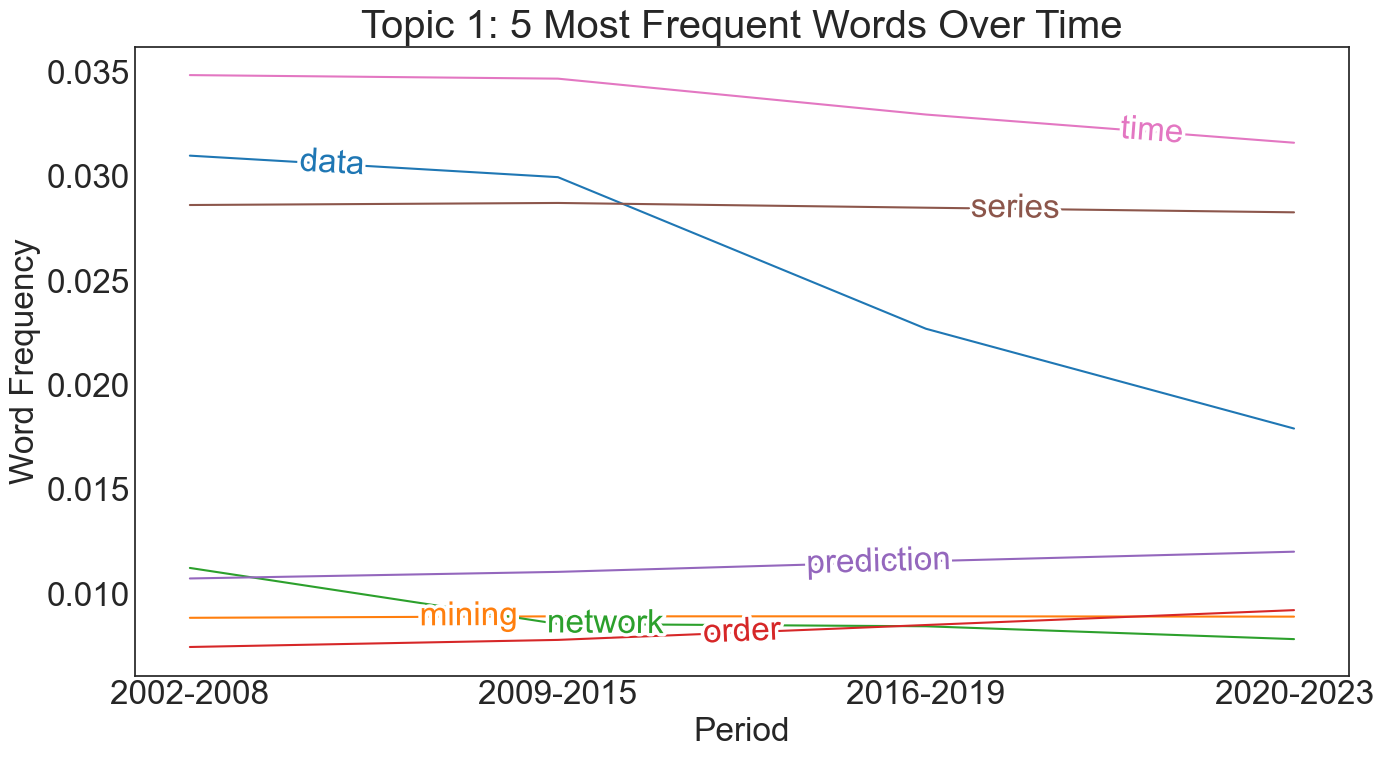

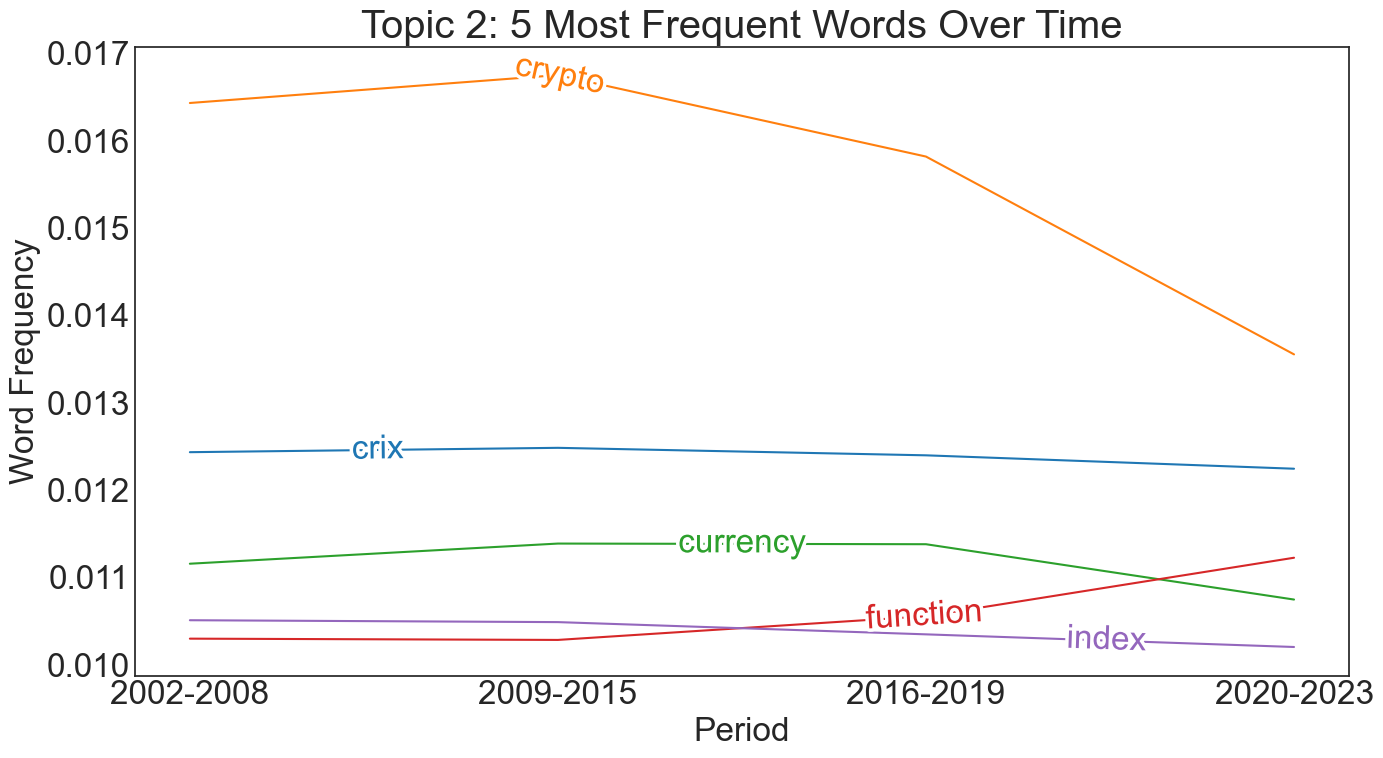

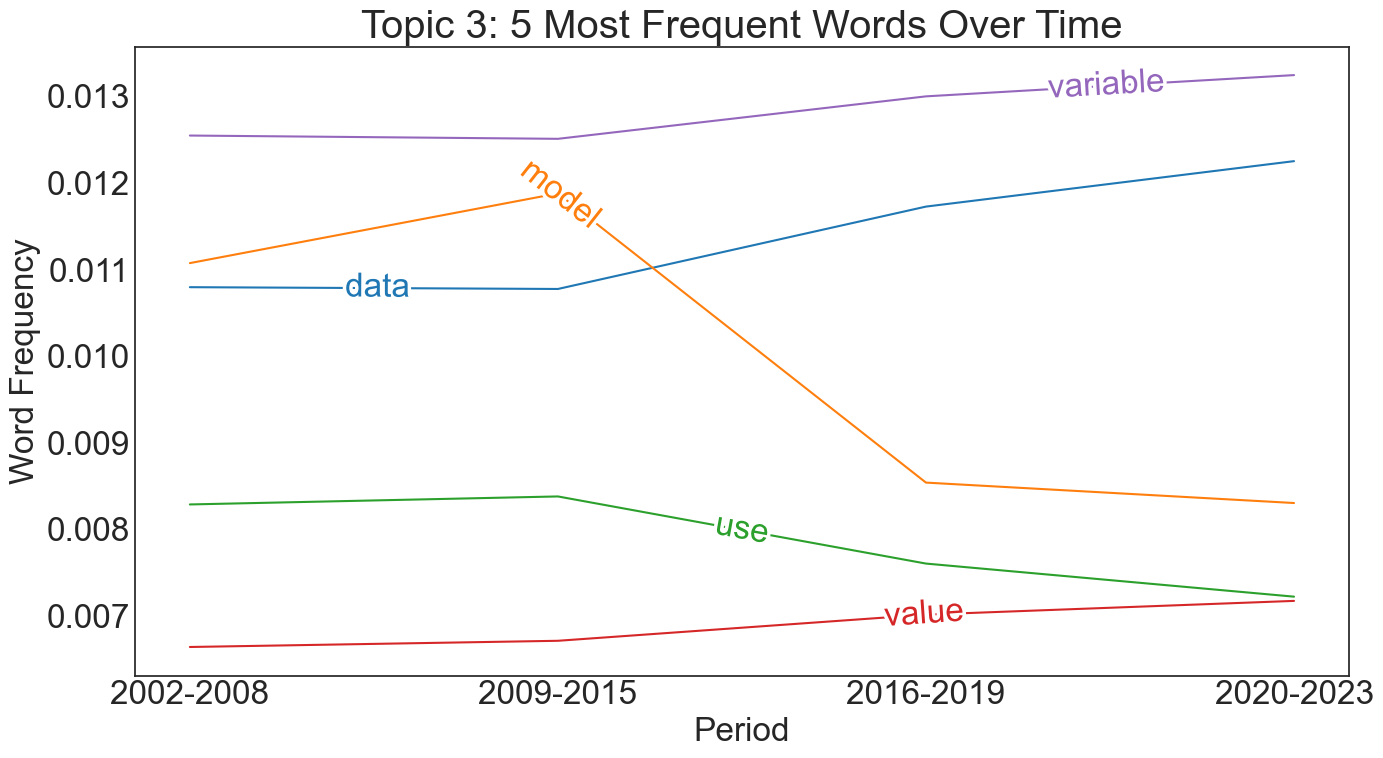

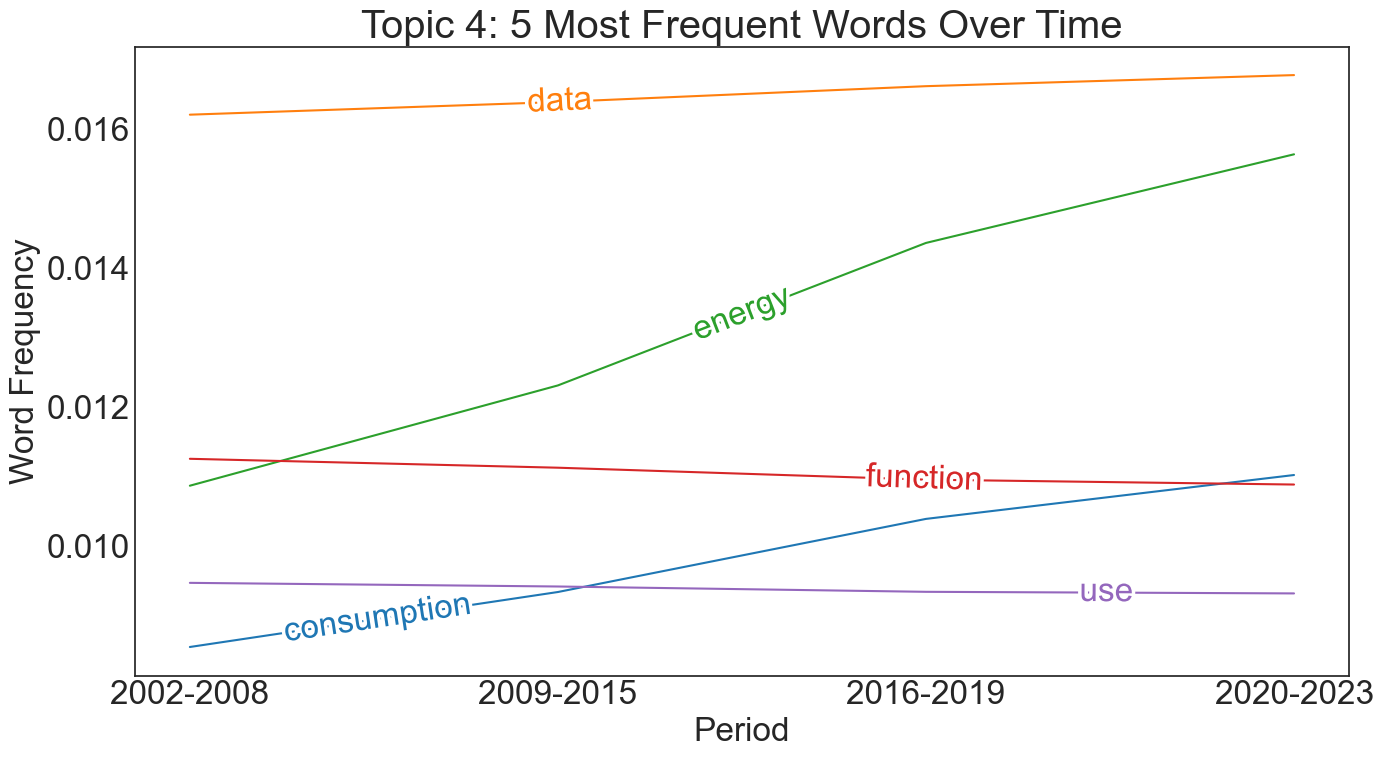

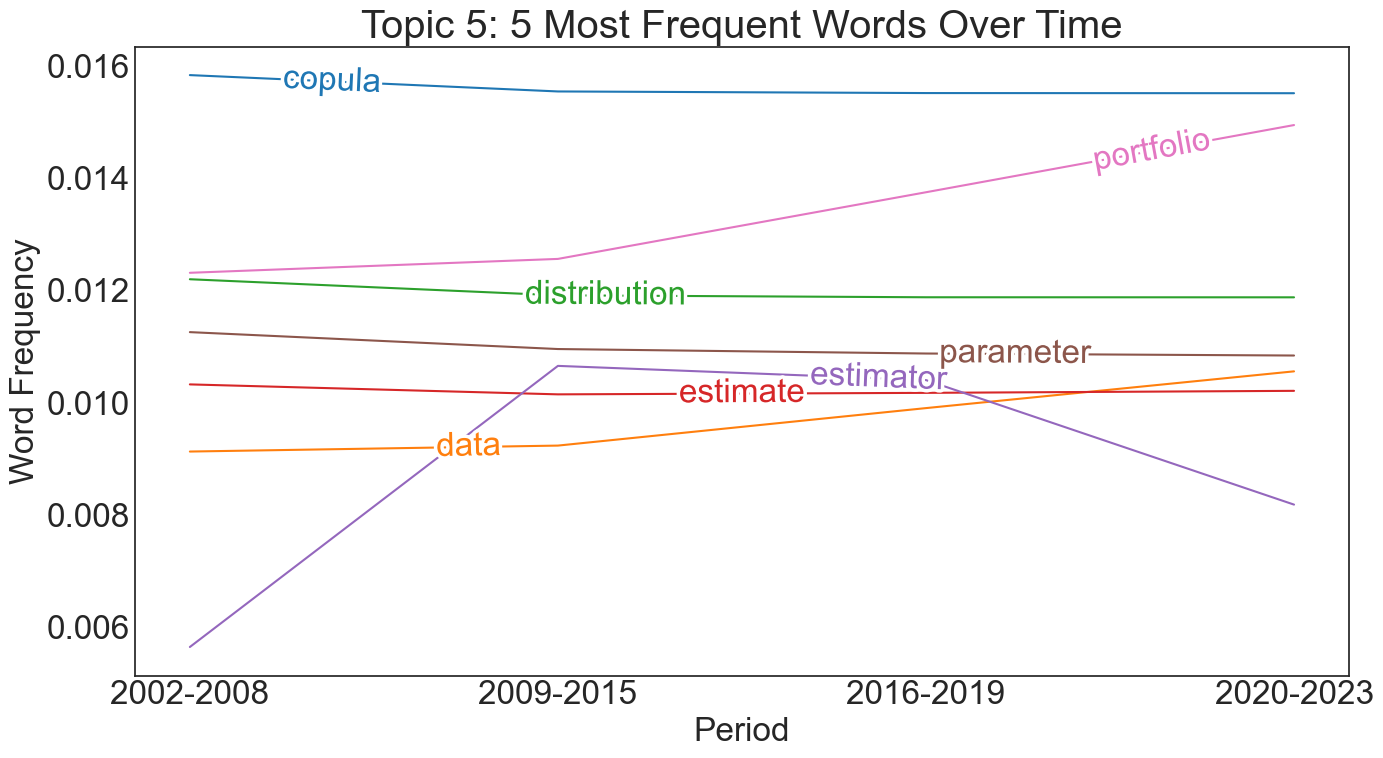

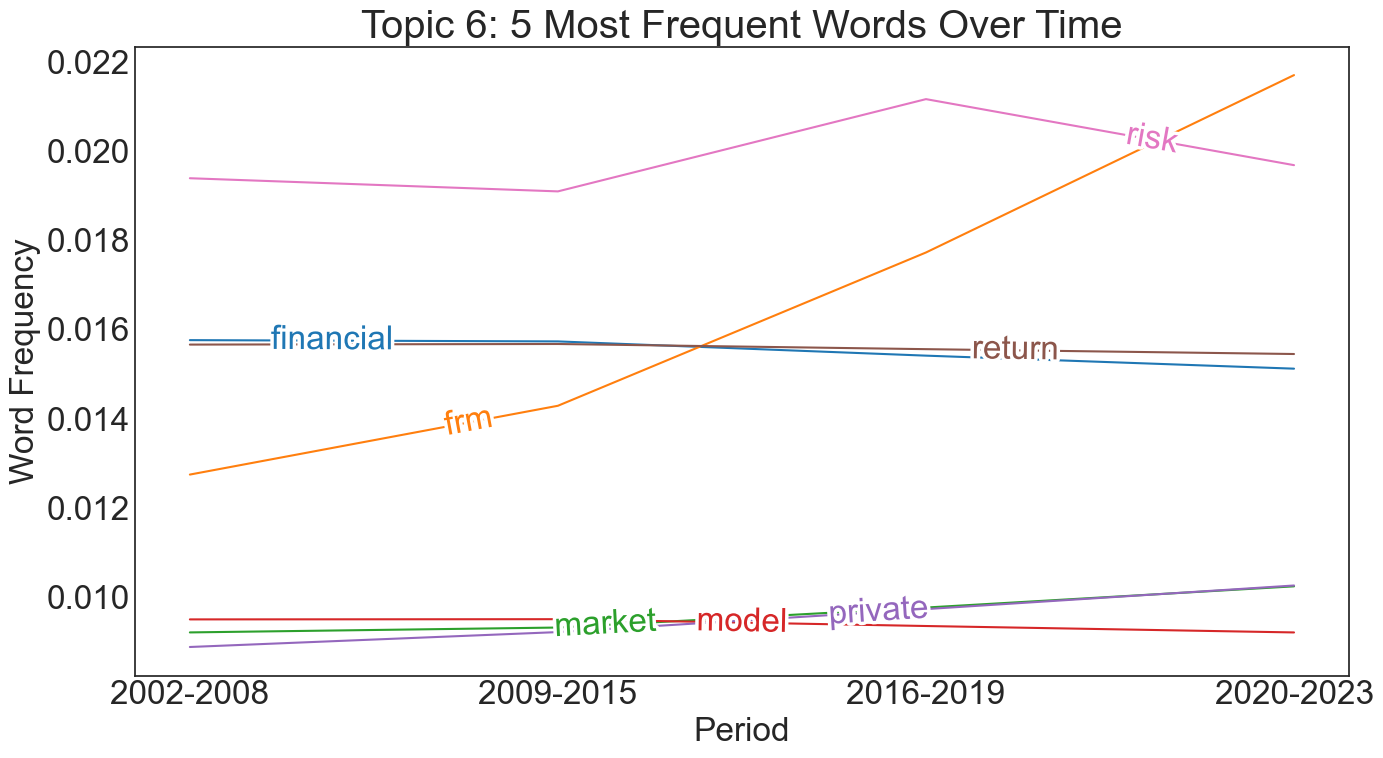

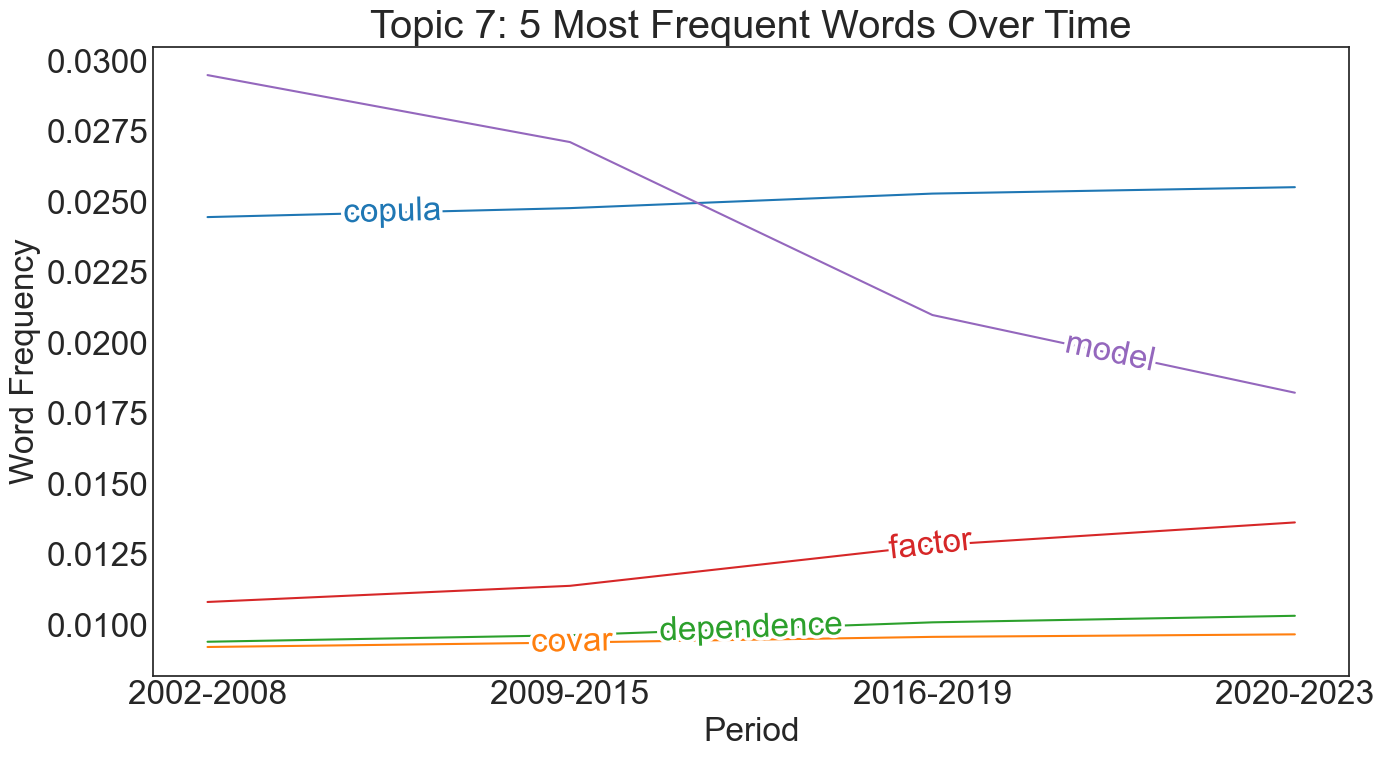

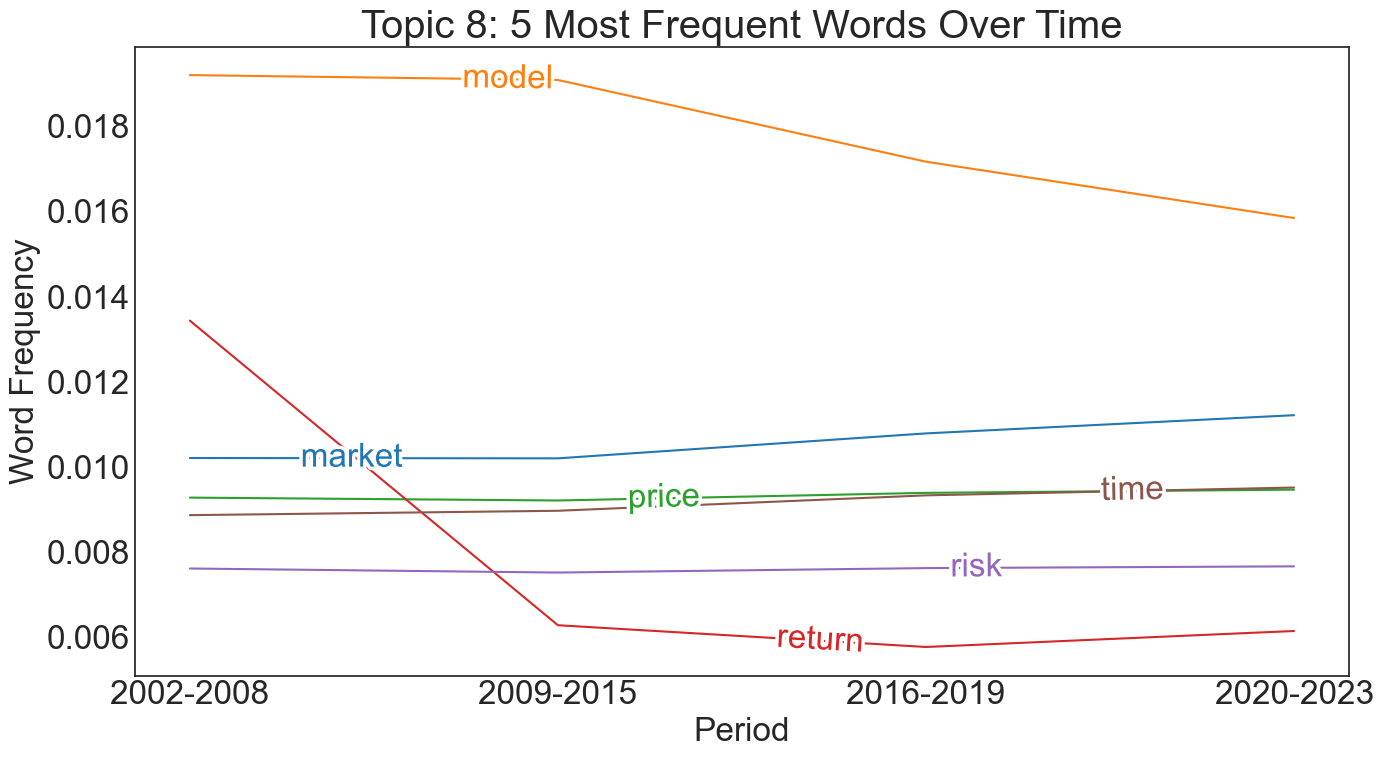

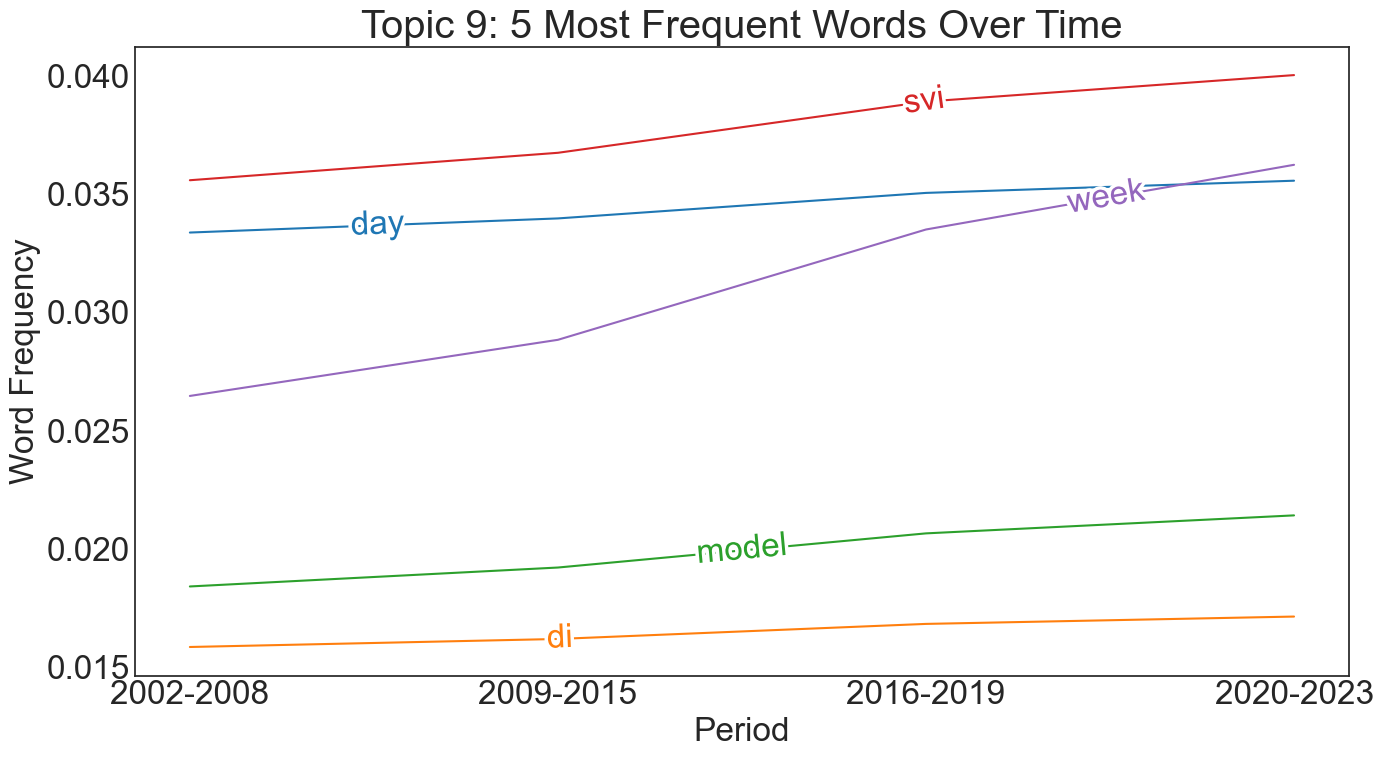

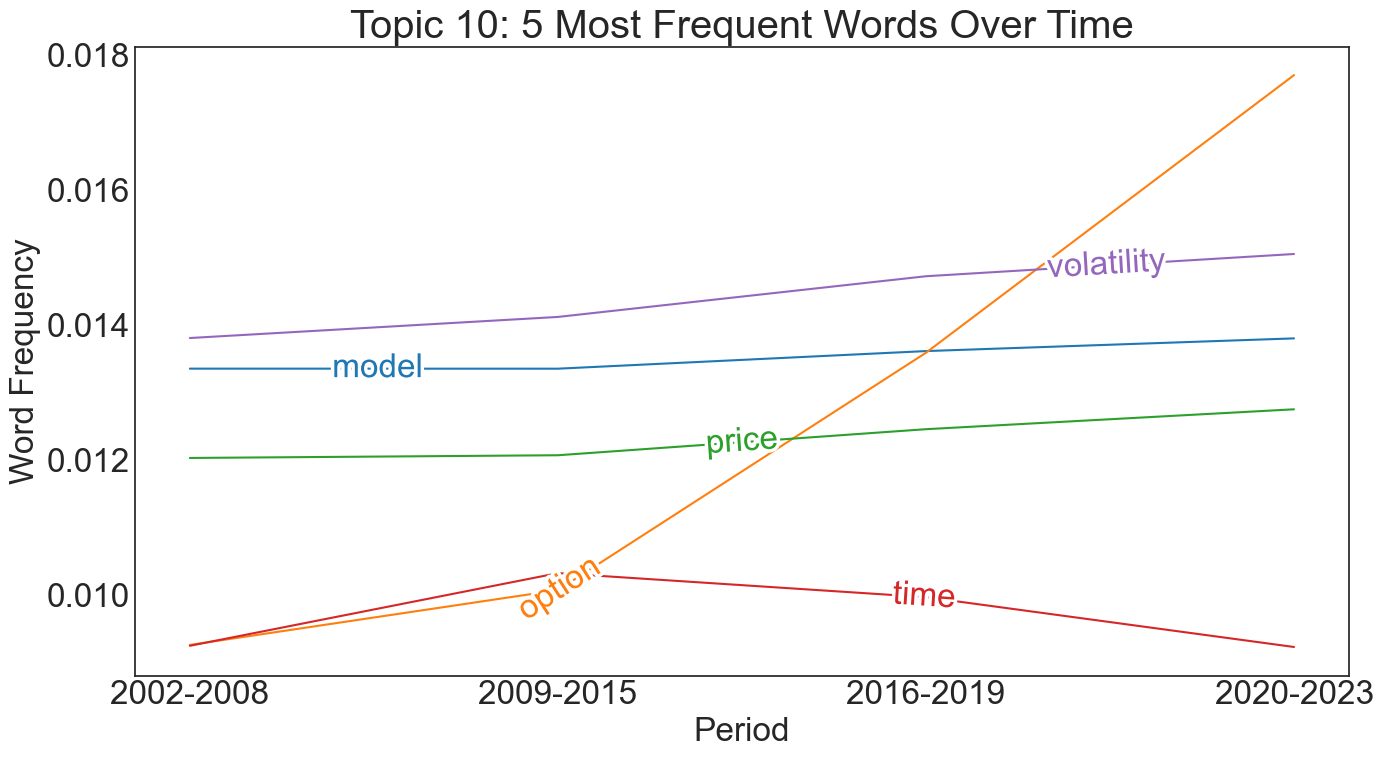

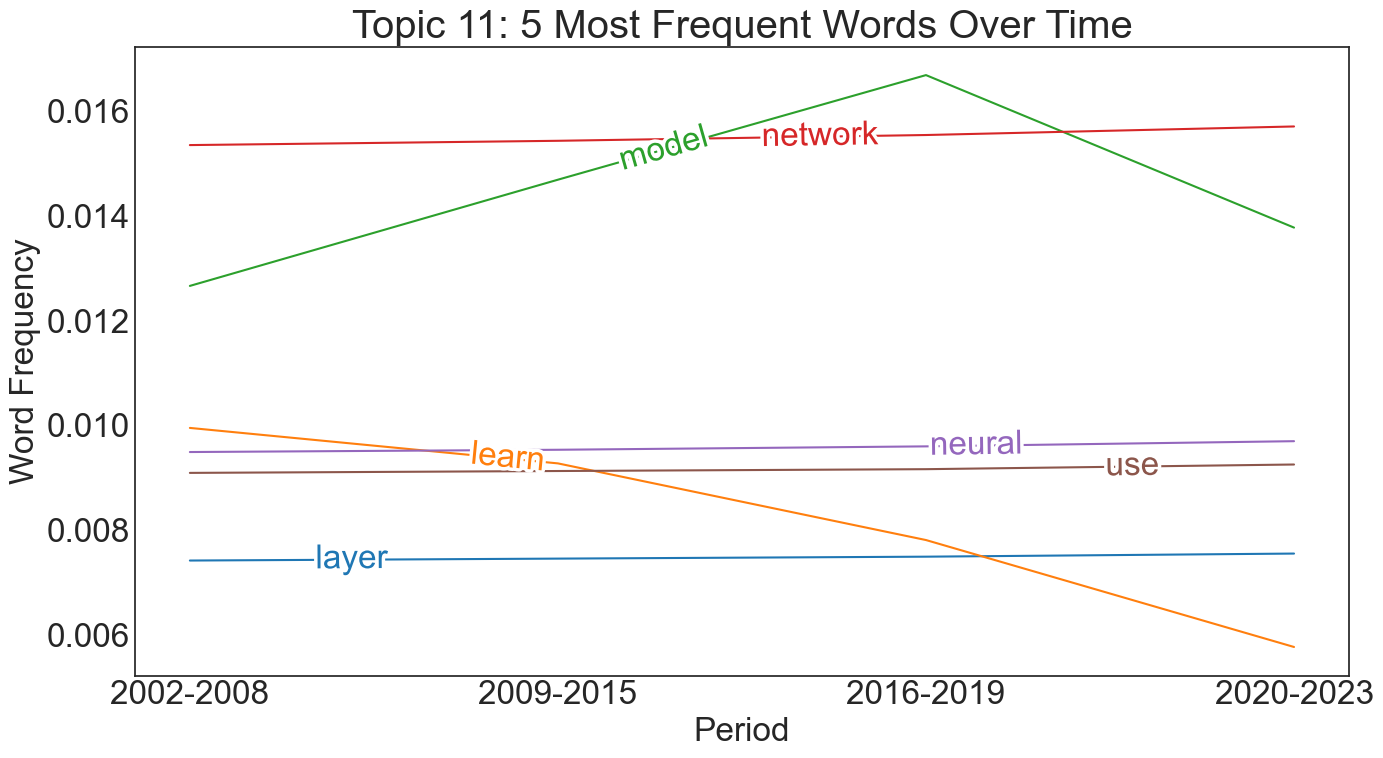

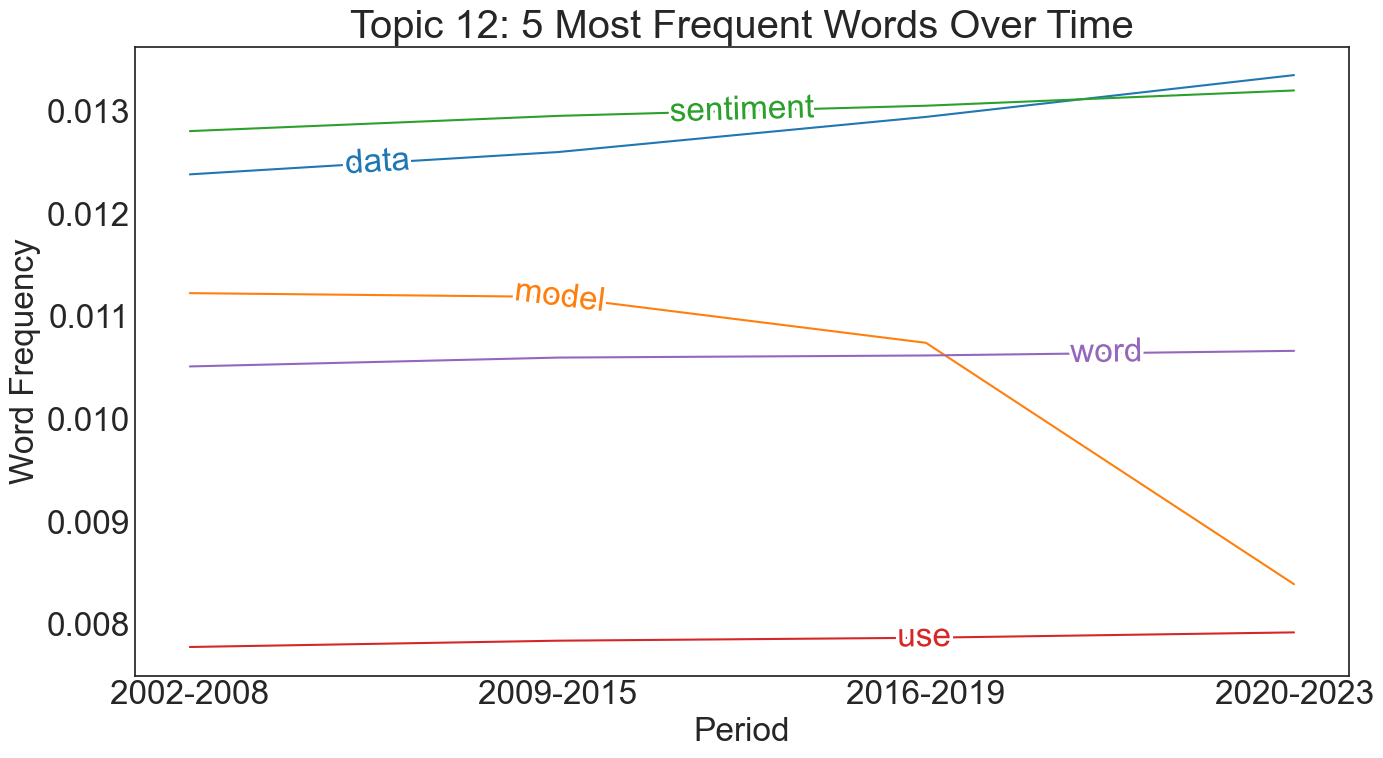

In [6]:
# Specify the input folder
topic_folder = 'Topics_CSVs/topics_words_time'
# Run the method
MSc_LDA.DTM_Plot(topic_folder = topic_folder)

### *Reproducibility disclaimer:*<br>
Reproducibility is ensured where possible. The results of the topic modeling can be reproduced by unpickling the corpus data included in the DICT_CORP folder of the making corpus quantlet.

However, the exact results cannot be replicated *if* the user opts to begin with the first step of the project: scraping the theses from the HU website, processing it and then building the corpus. The reason for this is that the project included master's theses scanned from physical copies (not present on the HU website) in its dataset. 

Also note that none of the master's theses, either obtained via scraping or scanning are included in the published directories of the project.

For obtaining PDF-scans of physically stored MSc theses, please contact Prof. Härdle at HU Berlin. 